## Problem Statement: Understand the factors contributing to attrition and develop predictive models to identify at-risk employees and predict the whether the employee has left the company

---


### FEATURES:

**Employee ID:** A unique identifier assigned to each employee.

**Age:** The age of the employee, ranging from 18 to 60 years.

**Gender:** The gender of the employee

**Years at Company:** The number of years the employee has been working at the company.

**Monthly Income:** The monthly salary of the employee, in dollars.

**Job Role:** The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.

**Work-Life Balance:** The employee's perceived balance between work and personal life, (Poor, Below Average, Good, Excellent)

**Job Satisfaction:** The employee's satisfaction with their job: (Very Low, Low, Medium, High)

**Performance Rating:** The employee's performance rating: (Low, Below Average, Average, High)

**Number of Promotions:** The total number of promotions the employee has received.

**Distance from Home:** The distance between the employee's home and workplace, in miles.

**Education Level:** The highest education level attained by the employee: (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD)

**Marital Status:** The marital status of the employee: (Divorced, Married, Single)

**Job Level:** The job level of the employee: (Entry, Mid, Senior)

**Company Size:** The size of the company the employee works for: (Small,Medium,Large)

**Company Tenure:** The total number of years the employee has been working in the industry.

**Remote Work:** Whether the employee works remotely: (Yes or No)

**Leadership Opportunities:** Whether the employee has leadership opportunities: (Yes or No)

**Innovation Opportunities:** Whether the employee has opportunities for innovation: (Yes or No)

**Company Reputation:** The employee's perception of the company's reputation: (Very Poor, Poor,Good, Excellent)

**Employee Recognition:** The level of recognition the employee receives:(Very Low, Low, Medium, High)

**Attrition:** Whether the employee has left the company, encoded as 0 (stayed) and 1 (Left).

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import optuna
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [2]:
data = pd.read_csv("train.csv")
data

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
59594,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
59595,54887,22,Female,14,Technology,7944,Fair,High,High,0,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
59596,861,23,Male,8,Education,2931,Fair,Very High,Average,0,...,0,Entry,Large,9,No,No,No,Good,Low,Left


## Taking Sample from whole data

In [3]:
data1, _ = train_test_split(data, train_size=10000, stratify=data['Attrition'], random_state=42)

In [4]:
data1.reset_index(inplace=True)

In [5]:
data1

,index,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,40728,57886,51,Male,32,Healthcare,8287,Poor,High,Average,...,5,Senior,Small,82,No,No,Yes,Poor,Medium,Stayed
1,56080,20026,40,Male,8,Education,4728,Good,Very High,Average,...,2,Senior,Large,47,No,No,No,Good,Low,Stayed
2,46877,37781,50,Male,5,Technology,9596,Good,Medium,High,...,0,Entry,Small,65,No,No,No,Good,Very High,Stayed
3,33865,44457,56,Male,21,Technology,9349,Good,Low,Average,...,0,Entry,Small,66,Yes,No,No,Poor,Medium,Stayed
4,46301,50260,28,Male,11,Media,5663,Excellent,Medium,Average,...,1,Senior,Medium,72,No,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,23485,37948,42,Male,12,Media,6266,Excellent,High,High,...,4,Entry,Small,34,No,No,No,Good,Low,Stayed
9996,21752,73373,28,Male,12,Finance,6829,Excellent,Medium,High,...,0,Senior,Medium,65,No,No,No,Fair,High,Stayed
9997,25384,42640,46,Female,28,Finance,10145,Fair,Very High,Average,...,1,Entry,Medium,43,No,No,No,Fair,High,Left
9998,7689,71702,55,Female,16,Technology,10892,Poor,High,Low,...,1,Senior,Medium,75,No,No,Yes,Good,Very High,Stayed


In [6]:
data1.drop(columns=["index","Employee ID","Job Role"], inplace=True)

In [7]:
datac = data1.copy()
datac

,Age,Gender,Years at Company,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,51,Male,32,8287,Poor,High,Average,0,Yes,38,...,5,Senior,Small,82,No,No,Yes,Poor,Medium,Stayed
1,40,Male,8,4728,Good,Very High,Average,0,Yes,17,...,2,Senior,Large,47,No,No,No,Good,Low,Stayed
2,50,Male,5,9596,Good,Medium,High,1,Yes,37,...,0,Entry,Small,65,No,No,No,Good,Very High,Stayed
3,56,Male,21,9349,Good,Low,Average,4,No,15,...,0,Entry,Small,66,Yes,No,No,Poor,Medium,Stayed
4,28,Male,11,5663,Excellent,Medium,Average,0,No,80,...,1,Senior,Medium,72,No,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,42,Male,12,6266,Excellent,High,High,0,No,23,...,4,Entry,Small,34,No,No,No,Good,Low,Stayed
9996,28,Male,12,6829,Excellent,Medium,High,2,No,12,...,0,Senior,Medium,65,No,No,No,Fair,High,Stayed
9997,46,Female,28,10145,Fair,Very High,Average,2,No,80,...,1,Entry,Medium,43,No,No,No,Fair,High,Left
9998,55,Female,16,10892,Poor,High,Low,0,No,19,...,1,Senior,Medium,75,No,No,Yes,Good,Very High,Stayed


In [8]:
datac.to_csv("Employee_Attrition_Data.csv", index=False)

## Data Quality

In [8]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       10000 non-null  int64 
 1   Gender                    10000 non-null  object
 2   Years at Company          10000 non-null  int64 
 3   Monthly Income            10000 non-null  int64 
 4   Work-Life Balance         10000 non-null  object
 5   Job Satisfaction          10000 non-null  object
 6   Performance Rating        10000 non-null  object
 7   Number of Promotions      10000 non-null  int64 
 8   Overtime                  10000 non-null  object
 9   Distance from Home        10000 non-null  int64 
 10  Education Level           10000 non-null  object
 11  Marital Status            10000 non-null  object
 12  Number of Dependents      10000 non-null  int64 
 13  Job Level                 10000 non-null  object
 14  Company Size           

In [9]:
datac.describe()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000
mean,38.389700,15.612500,7311.957300,0.8363,49.873700,1.621900,55.443100
std,12.023913,11.156576,2147.857322,0.9987,28.497357,1.555436,25.196104
min,18.000000,1.000000,1316.000000,0.0000,1.000000,0.000000,2.000000
25%,28.000000,7.000000,5659.000000,0.0000,25.000000,0.000000,35.750000
50%,38.000000,13.000000,7369.000000,1.0000,50.000000,1.000000,55.000000
75%,49.000000,23.000000,8872.250000,2.0000,74.000000,3.000000,75.000000
max,59.000000,51.000000,14276.000000,4.0000,99.000000,6.000000,126.000000


## Simple EDA

In [10]:
datac.columns

Index(['Age', 'Gender', 'Years at Company', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

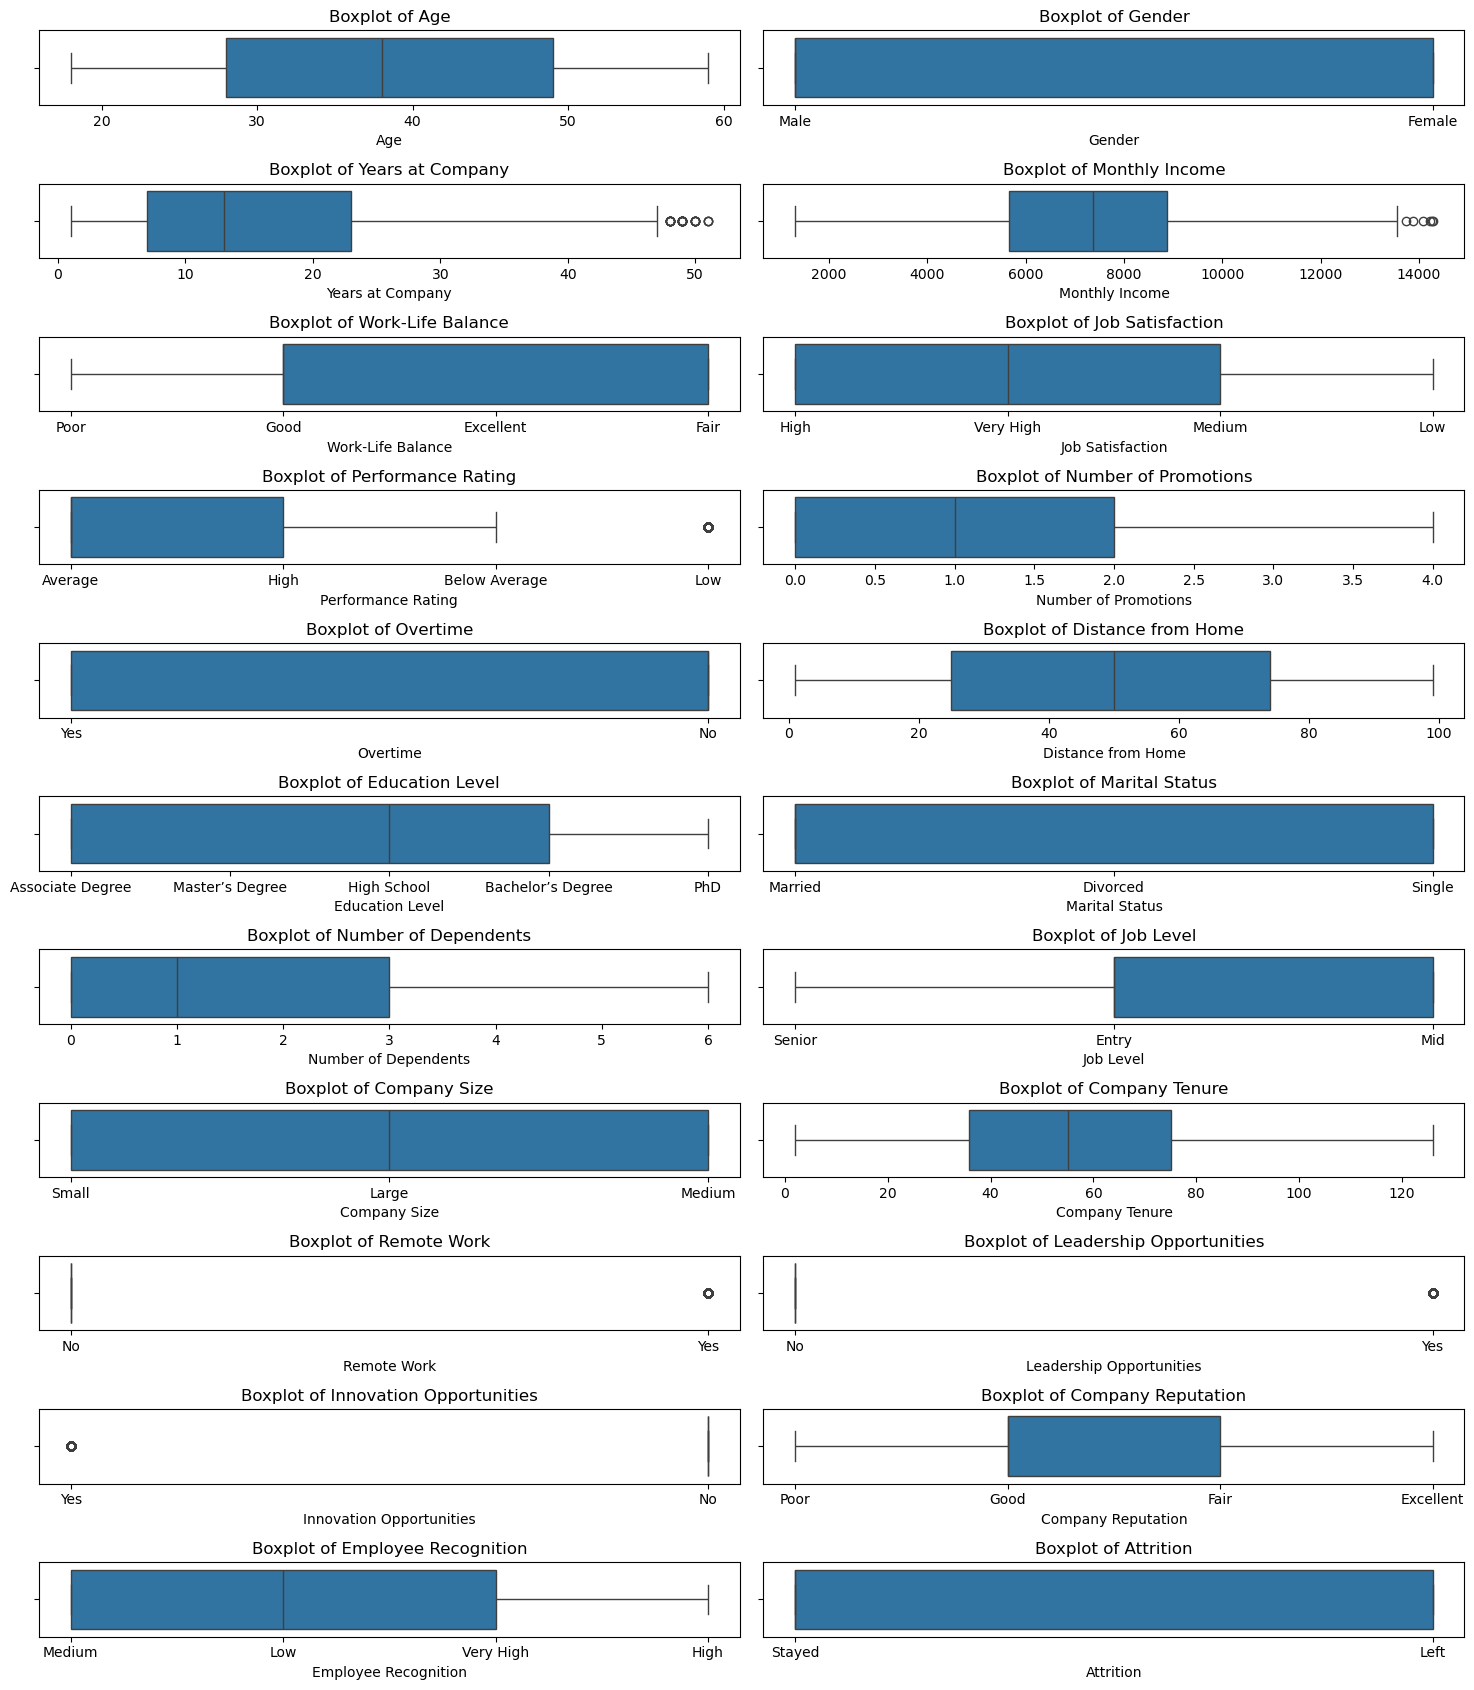

In [11]:
plt.figure(figsize=(15, 17))

columns = ['Age', 'Gender', 'Years at Company', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition']

for i, col in enumerate(columns, 1):
    plt.subplot(11, 2, i)
    sns.boxplot(x=datac[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## Insight:

+ We can see there no outliers in our dataset except in Monthly income and Years at company column which having very less outliers

---

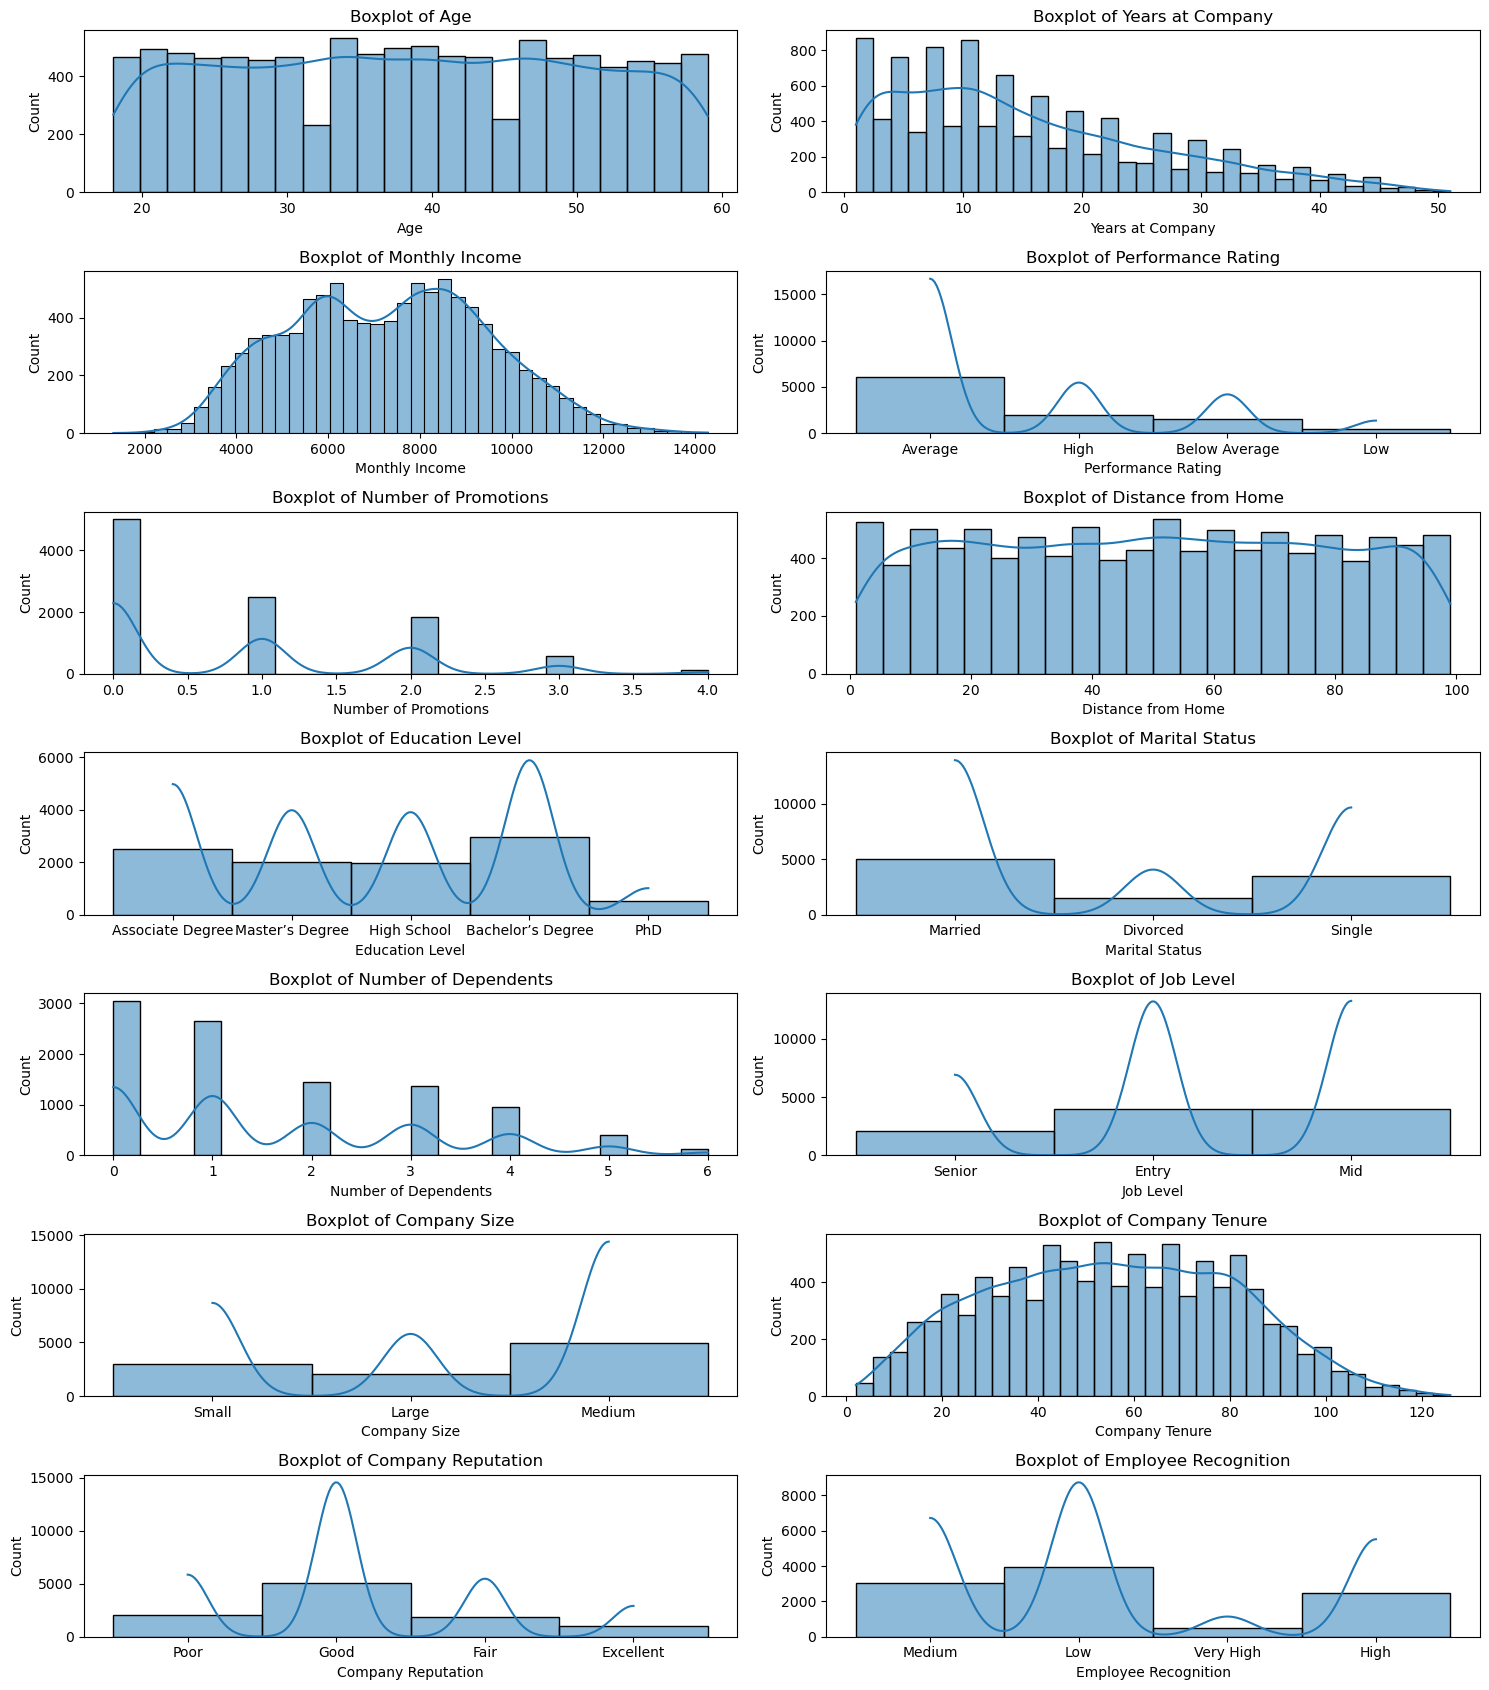

In [12]:
plt.figure(figsize=(15, 17))

columns = ['Age', 'Years at Company', 'Monthly Income',
       'Performance Rating','Number of Promotions', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure',
       'Company Reputation', 'Employee Recognition',]

for i, col in enumerate(columns, 1):
    plt.subplot(7, 2, i)
    sns.histplot(x=datac[col],kde=True)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## Target Column Distribution

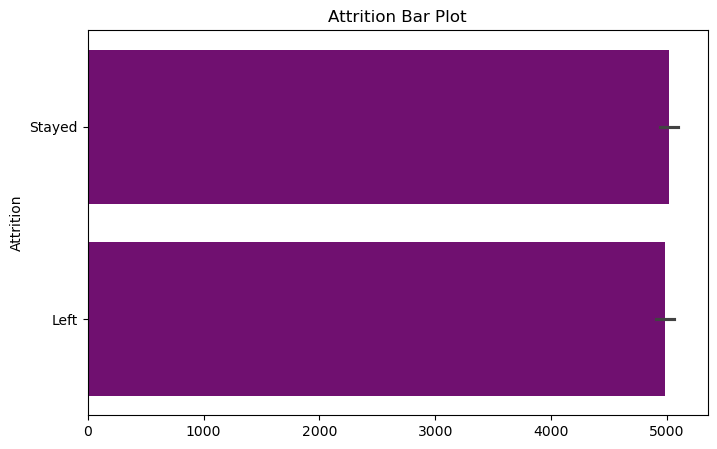

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(datac["Attrition"], fill=True, color="purple", )
plt.title('Attrition Bar Plot')
plt.show()

In [14]:
datac["Attrition"].value_counts()

Attrition
Stayed    5245
Left      4755
Name: count, dtype: int64

## Insight:

+ Our Target Column is slightly Imbalanced

---

Text(0, 0.5, 'Count')

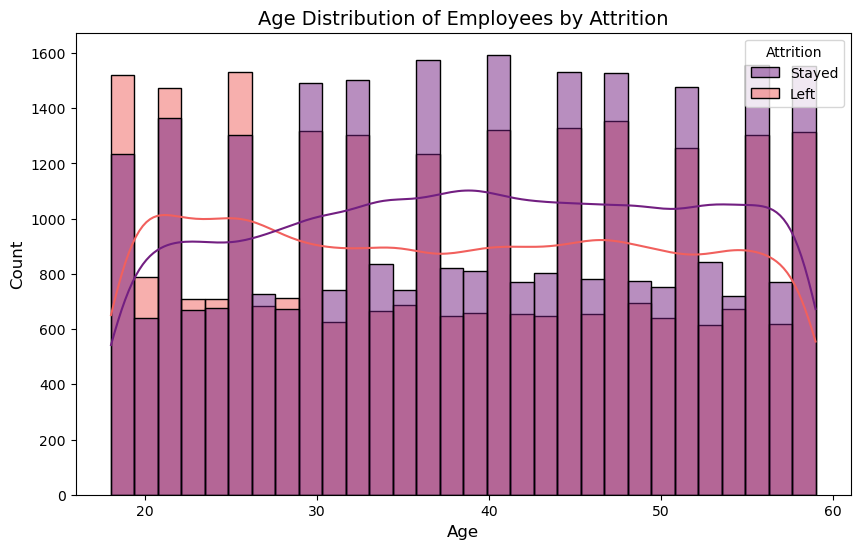

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data, x="Age", hue="Attrition", kde=True, palette="magma", bins=30, ax=ax)
ax.set_title("Age Distribution of Employees by Attrition", fontsize=14)
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

Text(0, 0.5, 'Monthly Income')

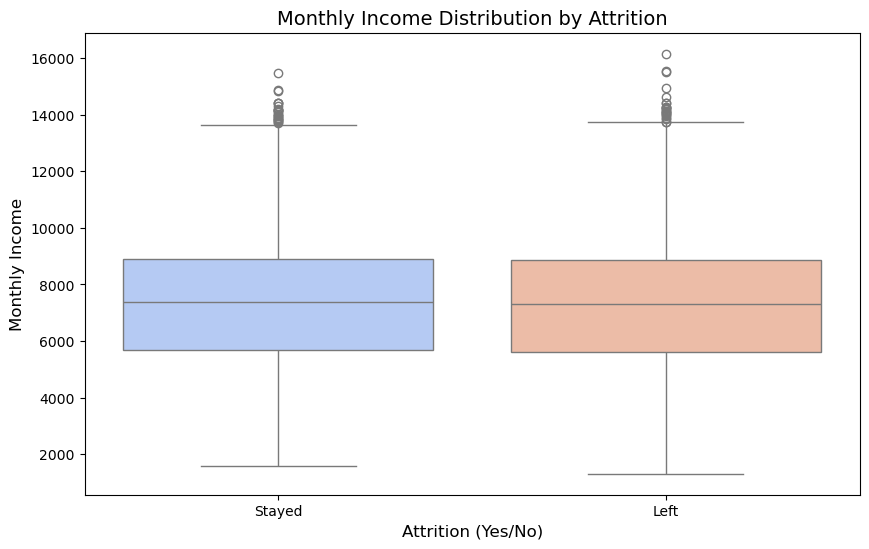

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="Attrition", y="Monthly Income", data=data, hue="Attrition", palette="coolwarm", ax=ax, dodge=False)
ax.set_title("Monthly Income Distribution by Attrition", fontsize=14)
ax.set_xlabel("Attrition (Yes/No)", fontsize=12)
ax.set_ylabel("Monthly Income", fontsize=12)

## ML Data pre-processing

In [113]:
fv = datac.iloc[:,:-1]
cv = datac.iloc[:,-1]

In [114]:
fv.head()

,Age,Gender,Years at Company,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
0,51,Male,32,8287,Poor,High,Average,0,Yes,38,...,Married,5,Senior,Small,82,No,No,Yes,Poor,Medium
1,40,Male,8,4728,Good,Very High,Average,0,Yes,17,...,Divorced,2,Senior,Large,47,No,No,No,Good,Low
2,50,Male,5,9596,Good,Medium,High,1,Yes,37,...,Married,0,Entry,Small,65,No,No,No,Good,Very High
3,56,Male,21,9349,Good,Low,Average,4,No,15,...,Married,0,Entry,Small,66,Yes,No,No,Poor,Medium
4,28,Male,11,5663,Excellent,Medium,Average,0,No,80,...,Married,1,Senior,Medium,72,No,No,No,Good,High


In [115]:
## "Stayed" --> 0
## "Left" --> 1

cv = cv.map({"Stayed":0, "Left":1})

In [124]:
cv

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    0
Name: Attrition, Length: 10000, dtype: int64

In [125]:
x_train, x_test, y_train, y_test = train_test_split(fv,cv,test_size=0.3,stratify=cv)

## Feature Selection Using RandomForest

In [18]:
def objective(trial):

    min_split = trial.suggest_int("min_samples_split", 2, 10)    ## High Variance Model
    min_leaf = trial.suggest_int("min_samples_leaf", 1, 5)
    max_feature = trial.suggest_categorical("max_feature",["log2","sqrt"])   ## Should not use "None"
        
    n_est = trial.suggest_int("n_est",20,100)
    max_sample = trial.suggest_float("max_samples", 0.6, 0.9)
    max_depth = trial.suggest_int("max_depth", 20, 30)
    
    be = RandomForestClassifier(n_estimators=n_est, max_samples=max_sample, min_samples_split=min_split,
                               min_samples_leaf=min_leaf, max_features=max_feature, max_depth=max_depth)

    cv_score = cross_validate(estimator=be, X=x_train, y=y_train, cv=4,scoring="roc_auc")["test_score"].mean()
    train_score = cross_validate(estimator=be, X=x_train, y=y_train, cv=4,scoring="roc_auc", return_train_score=True)["train_score"].mean()
    
    trial.set_user_attr("training score",train_score)
    
    return cv_score

In [19]:
study = optuna.create_study(direction="maximize", sampler= optuna.samplers.TPESampler())

[I 2025-02-23 19:46:21,861] A new study created in memory with name: no-name-d3393ac9-3c7d-42dd-ab3d-b58aa58a1ac0


In [20]:
study.optimize(objective,n_trials=100, n_jobs=-1)

[I 2025-02-23 19:46:32,459] Trial 2 finished with value: 0.8213699746687734 and parameters: {'min_samples_split': 6, 'min_samples_leaf': 2, 'max_feature': 'log2', 'n_est': 31, 'max_samples': 0.6422648303274336, 'max_depth': 25}. Best is trial 2 with value: 0.8213699746687734.
[I 2025-02-23 19:46:36,100] Trial 5 finished with value: 0.8269655412866408 and parameters: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_feature': 'log2', 'n_est': 42, 'max_samples': 0.870803397030296, 'max_depth': 27}. Best is trial 5 with value: 0.8269655412866408.
[I 2025-02-23 19:46:37,957] Trial 4 finished with value: 0.8291996238817052 and parameters: {'min_samples_split': 3, 'min_samples_leaf': 4, 'max_feature': 'sqrt', 'n_est': 50, 'max_samples': 0.7021701153634986, 'max_depth': 23}. Best is trial 4 with value: 0.8291996238817052.
[I 2025-02-23 19:46:38,414] Trial 1 finished with value: 0.8217505316970342 and parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_feature': 'sqrt', 'n_est'

[I 2025-02-23 19:47:57,953] Trial 30 finished with value: 0.8329710912110583 and parameters: {'min_samples_split': 7, 'min_samples_leaf': 5, 'max_feature': 'sqrt', 'n_est': 86, 'max_samples': 0.8299814550762046, 'max_depth': 20}. Best is trial 30 with value: 0.8329710912110583.
[I 2025-02-23 19:48:02,685] Trial 31 finished with value: 0.8315963499511574 and parameters: {'min_samples_split': 7, 'min_samples_leaf': 5, 'max_feature': 'sqrt', 'n_est': 85, 'max_samples': 0.8429385786565694, 'max_depth': 29}. Best is trial 30 with value: 0.8329710912110583.
[I 2025-02-23 19:48:03,010] Trial 32 finished with value: 0.8310437891745188 and parameters: {'min_samples_split': 7, 'min_samples_leaf': 5, 'max_feature': 'sqrt', 'n_est': 83, 'max_samples': 0.8437023317764494, 'max_depth': 29}. Best is trial 30 with value: 0.8329710912110583.
[I 2025-02-23 19:48:07,295] Trial 33 finished with value: 0.8332825419830666 and parameters: {'min_samples_split': 7, 'min_samples_leaf': 5, 'max_feature': 'sqrt',

[I 2025-02-23 19:49:40,804] Trial 61 finished with value: 0.8297931738551426 and parameters: {'min_samples_split': 4, 'min_samples_leaf': 5, 'max_feature': 'sqrt', 'n_est': 68, 'max_samples': 0.7392805003150138, 'max_depth': 20}. Best is trial 33 with value: 0.8332825419830666.
[I 2025-02-23 19:49:45,225] Trial 59 finished with value: 0.8316054656612946 and parameters: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_feature': 'log2', 'n_est': 96, 'max_samples': 0.6930340603761206, 'max_depth': 27}. Best is trial 33 with value: 0.8332825419830666.
[I 2025-02-23 19:49:45,850] Trial 63 finished with value: 0.8260112809849063 and parameters: {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_feature': 'sqrt', 'n_est': 69, 'max_samples': 0.6683664571847532, 'max_depth': 25}. Best is trial 33 with value: 0.8332825419830666.
[I 2025-02-23 19:49:47,843] Trial 62 finished with value: 0.8326974568182346 and parameters: {'min_samples_split': 4, 'min_samples_leaf': 5, 'max_feature': 'sqrt',

[I 2025-02-23 19:51:19,550] Trial 90 finished with value: 0.8337824132777849 and parameters: {'min_samples_split': 3, 'min_samples_leaf': 5, 'max_feature': 'sqrt', 'n_est': 91, 'max_samples': 0.7406523777996423, 'max_depth': 20}. Best is trial 89 with value: 0.8342629295025222.
[I 2025-02-23 19:51:23,032] Trial 93 finished with value: 0.832554095421653 and parameters: {'min_samples_split': 6, 'min_samples_leaf': 5, 'max_feature': 'sqrt', 'n_est': 85, 'max_samples': 0.7411572679580769, 'max_depth': 21}. Best is trial 89 with value: 0.8342629295025222.
[I 2025-02-23 19:51:23,995] Trial 91 finished with value: 0.83219099641349 and parameters: {'min_samples_split': 3, 'min_samples_leaf': 5, 'max_feature': 'sqrt', 'n_est': 91, 'max_samples': 0.7403857580514945, 'max_depth': 20}. Best is trial 89 with value: 0.8342629295025222.
[I 2025-02-23 19:51:25,900] Trial 92 finished with value: 0.8335477295130157 and parameters: {'min_samples_split': 3, 'min_samples_leaf': 5, 'max_feature': 'sqrt', 'n

In [22]:
df2 = study.trials_dataframe()
df2

,number,value,datetime_start,datetime_complete,duration,params_max_depth,params_max_feature,params_max_samples,params_min_samples_leaf,params_min_samples_split,params_n_est,user_attrs_training score,state
0,0,0.828993,2025-02-23 19:46:22.403617,2025-02-23 19:46:51.354375,0 days 00:00:28.950758,24,sqrt,0.732397,2,5,90,0.995795,COMPLETE
1,1,0.821751,2025-02-23 19:46:22.409698,2025-02-23 19:46:38.413385,0 days 00:00:16.003687,26,sqrt,0.680960,1,5,48,0.997157,COMPLETE
2,2,0.821370,2025-02-23 19:46:22.412641,2025-02-23 19:46:32.457558,0 days 00:00:10.044917,25,log2,0.642265,2,6,31,0.984371,COMPLETE
3,3,0.829154,2025-02-23 19:46:22.420712,2025-02-23 19:46:44.880789,0 days 00:00:22.460077,25,sqrt,0.735432,3,6,71,0.985171,COMPLETE
4,4,0.829200,2025-02-23 19:46:22.422684,2025-02-23 19:46:37.956356,0 days 00:00:15.533672,23,sqrt,0.702170,4,3,50,0.967350,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.832119,2025-02-23 19:51:05.177753,2025-02-23 19:51:29.510318,0 days 00:00:24.332565,29,sqrt,0.615361,5,6,85,0.949840,COMPLETE
96,96,0.831745,2025-02-23 19:51:09.831413,2025-02-23 19:51:32.506839,0 days 00:00:22.675426,29,sqrt,0.613272,5,6,91,0.949381,COMPLETE
97,97,0.831395,2025-02-23 19:51:17.521555,2025-02-23 19:51:35.695527,0 days 00:00:18.173972,21,sqrt,0.616041,5,6,91,0.948792,COMPLETE
98,98,0.833355,2025-02-23 19:51:19.559885,2025-02-23 19:51:36.799821,0 days 00:00:17.239936,21,sqrt,0.613802,5,2,100,0.949453,COMPLETE


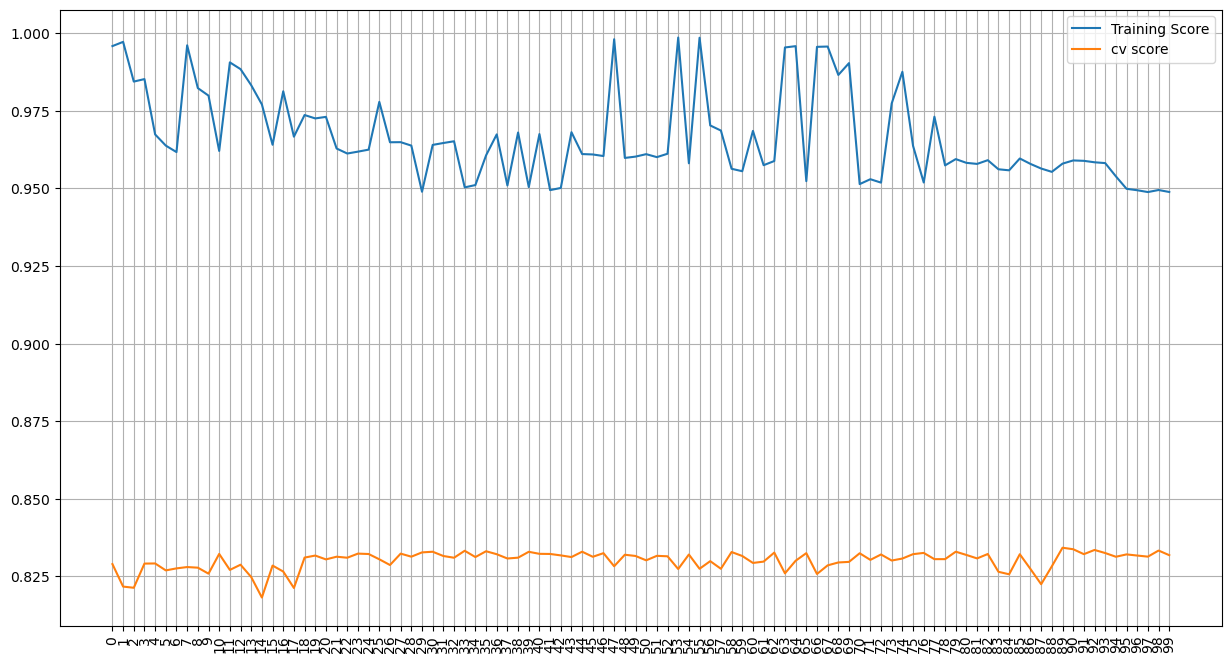

In [24]:
plt.figure(figsize=(15,8))
plt.plot(df2["number"],df2["user_attrs_training score"],label = "Training Score")
plt.plot(df2["number"],df2["value"],label = "cv score")
plt.legend()
plt.grid()
plt.xticks(df2["number"], rotation=90)
plt.show()

In [26]:
## Best-fit model

df2.iloc[29]

number                                               29
value                                          0.832761
datetime_start               2025-02-23 19:47:28.897369
datetime_complete            2025-02-23 19:47:54.150049
duration                         0 days 00:00:25.252680
params_max_depth                                     20
params_max_feature                                 sqrt
params_max_samples                             0.604329
params_min_samples_leaf                               5
params_min_samples_split                              7
params_n_est                                         84
user_attrs_training score                       0.94889
state                                          COMPLETE
Name: 29, dtype: object

In [88]:
## Best-Fit Model

rf = RandomForestClassifier(n_estimators=84, max_samples=0.604329, max_features="sqrt", min_samples_leaf=5, min_samples_split=7, max_depth=20)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, max_samples=0.604329, min_samples_leaf=5,
                       min_samples_split=7, n_estimators=84)

In [134]:
feature_importance = rf.feature_importances_
feature_importance

array([0.06769092, 0.01883581, 0.01476299, 0.16519572, 0.0144145 ,
       0.03066812, 0.02002101, 0.03454933, 0.0188977 , 0.04893211,
       0.09556562, 0.01298651, 0.06905878, 0.00156227, 0.00576172,
       0.05321981, 0.05878358, 0.06300481, 0.03959904, 0.07158747,
       0.03733775, 0.05756442])

In [135]:
threshold = np.mean(feature_importance)  
selected_features = np.where(feature_importance > threshold)[0]  # Indices  

print("Selected feature indices:", selected_features)

Selected feature indices: [ 0  3  9 10 12 15 16 17 19 21]


In [136]:
## Important Features

final_df = datac.iloc[:, [0,3,9,10,12,15,16,17,19]]
final_df

,Age,Monthly Income,Distance from Home,Education Level,Number of Dependents,Company Tenure,Remote Work,Leadership Opportunities,Company Reputation
0,51,8287,38,Associate Degree,5,82,No,No,Poor
1,40,4728,17,Master’s Degree,2,47,No,No,Good
2,50,9596,37,High School,0,65,No,No,Good
3,56,9349,15,Bachelor’s Degree,0,66,Yes,No,Poor
4,28,5663,80,Associate Degree,1,72,No,No,Good
...,...,...,...,...,...,...,...,...,...
9995,42,6266,23,Associate Degree,4,34,No,No,Good
9996,28,6829,12,High School,0,65,No,No,Fair
9997,46,10145,80,Bachelor’s Degree,1,43,No,No,Fair
9998,55,10892,19,PhD,1,75,No,No,Good


In [137]:
## Splitted the Data

x_train, x_test, y_train, y_test = train_test_split(final_df,cv,test_size=0.3,stratify=cv)

### Applying Ordinal, One-Hot Encoding and Robust Scaling

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

In [138]:
ordinal_cols = {
    "Education Level":["High School", "Associate Degree", "Bachelor’s Degree", "Master’s Degree", "PhD"],
    "Company Reputation": ["Poor", "Fair", "Good", "Excellent"]
}

nominal_cols = ["Remote Work","Leadership Opportunities"]
cont_cols = ["Age", "Monthly Income", "Distance from Home","Number of Dependents", "Company Tenure"]

ordinal_encoder = OrdinalEncoder(categories=[ordinal_cols[col] for col in ordinal_cols])

onehot_encoder = OneHotEncoder(drop="first", sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(categories=[ordinal_cols[col] for col in ordinal_cols]) , [i for i, col in enumerate(x_train.columns) if col in ordinal_cols]),  # Ordinal Encoding
        ("onehot", OneHotEncoder(drop="first", sparse_output=False) , [i for i, col in enumerate(x_train.columns) if col in nominal_cols]),  # One-Hot Encoding
        ("Robust Scaling", RobustScaler(), [i for i, col in enumerate(x_train.columns) if col in cont_cols])   ## Robust Scaling
    ], remainder="passthrough"
)

In [139]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

## Model Building

---

### A. VotingClassifier

In [27]:
np.sqrt(len(x_train))

83.66600265340756

In [140]:
def objective(trial):
    
    k1 = trial.suggest_int("neighbors1",10,20)    ## High Variance Model
    p1 = trial.suggest_categorical("distance1",[1,2])
    weights1 = trial.suggest_categorical("weights1",["uniform","distance"])
    
    model1 = KNeighborsClassifier(n_neighbors=k1, weights=weights1, p=p1, algorithm="auto")
    
    depth1 = trial.suggest_int("depth1",20,30)
    
    model2 = DecisionTreeClassifier(max_depth=depth1)            ## High variance Model
    
    k2 = trial.suggest_int("neighbors2",60,130)                  ## Low Variance Model
    p2 = trial.suggest_categorical("distance2",[1,2])
    weights2 = trial.suggest_categorical("weights2",["uniform","distance"])
    
    model3 = KNeighborsClassifier(n_neighbors=k2, weights=weights2, p=p2, algorithm="auto")
    
    depth2 = trial.suggest_int("depth2",10,20)     ## low Variance Model
    
    min_splits = trial.suggest_int("min_splits",5,25)
    
    min_leaf = trial.suggest_int("min_leaf",3,20)
    
    max_features = trial.suggest_categorical("max_features",[None,"sqrt","log2"])
    
    min_impurity = trial.suggest_float("min_impurity",0.0,0.05)
    
    model4 = DecisionTreeClassifier(max_depth=depth2, min_samples_split= min_splits, min_samples_leaf= min_leaf,
                                max_features= max_features, min_impurity_decrease= min_impurity)
    
    ve = VotingClassifier(estimators= [("knn1",model1), ("DT1",model2), ("knn2",model3), ("DT2",model4)],voting="soft")

    cv_score = cross_validate(estimator=ve, X=x_train, y=y_train, cv=4,scoring="roc_auc")["test_score"].mean()
    train_score = cross_validate(estimator=ve, X=x_train, y=y_train, cv=4,scoring="roc_auc", return_train_score=True)["train_score"].mean()
    
    trial.set_user_attr("training score",train_score)
    
    return cv_score

In [141]:
study = optuna.create_study(direction="maximize", sampler= optuna.samplers.TPESampler())

[I 2025-03-17 12:41:39,861] A new study created in memory with name: no-name-4e0372cf-922b-4f47-bbfb-9bdb5af1ea8d


In [142]:
study.optimize(objective,n_trials=120, n_jobs = -1)

[I 2025-03-17 12:41:59,527] Trial 2 finished with value: 0.6019315786262402 and parameters: {'neighbors1': 13, 'distance1': 1, 'weights1': 'distance', 'depth1': 23, 'neighbors2': 78, 'distance2': 2, 'weights2': 'uniform', 'depth2': 17, 'min_splits': 7, 'min_leaf': 10, 'max_features': 'sqrt', 'min_impurity': 0.03864904071491288}. Best is trial 2 with value: 0.6019315786262402.
[I 2025-03-17 12:41:59,706] Trial 6 finished with value: 0.6034682117596617 and parameters: {'neighbors1': 13, 'distance1': 1, 'weights1': 'distance', 'depth1': 28, 'neighbors2': 71, 'distance2': 2, 'weights2': 'uniform', 'depth2': 18, 'min_splits': 8, 'min_leaf': 6, 'max_features': None, 'min_impurity': 0.020382928261117678}. Best is trial 6 with value: 0.6034682117596617.
[I 2025-03-17 12:41:59,796] Trial 0 finished with value: 0.6025489234697179 and parameters: {'neighbors1': 17, 'distance1': 1, 'weights1': 'uniform', 'depth1': 29, 'neighbors2': 76, 'distance2': 2, 'weights2': 'distance', 'depth2': 17, 'min_spl

[I 2025-03-17 12:42:25,989] Trial 21 finished with value: 0.6018219901482833 and parameters: {'neighbors1': 19, 'distance1': 2, 'weights1': 'distance', 'depth1': 22, 'neighbors2': 128, 'distance2': 2, 'weights2': 'uniform', 'depth2': 13, 'min_splits': 11, 'min_leaf': 14, 'max_features': 'log2', 'min_impurity': 0.006211789029133756}. Best is trial 1 with value: 0.6131603348373913.
[I 2025-03-17 12:42:26,275] Trial 20 finished with value: 0.6075123232978145 and parameters: {'neighbors1': 20, 'distance1': 2, 'weights1': 'distance', 'depth1': 24, 'neighbors2': 128, 'distance2': 1, 'weights2': 'uniform', 'depth2': 12, 'min_splits': 10, 'min_leaf': 14, 'max_features': 'log2', 'min_impurity': 2.8006166406958216e-05}. Best is trial 1 with value: 0.6131603348373913.
[I 2025-03-17 12:42:32,740] Trial 24 finished with value: 0.6147803810904506 and parameters: {'neighbors1': 20, 'distance1': 2, 'weights1': 'uniform', 'depth1': 22, 'neighbors2': 114, 'distance2': 2, 'weights2': 'uniform', 'depth2':

[I 2025-03-17 12:43:04,365] Trial 45 finished with value: 0.5997467344583421 and parameters: {'neighbors1': 16, 'distance1': 1, 'weights1': 'distance', 'depth1': 23, 'neighbors2': 111, 'distance2': 2, 'weights2': 'distance', 'depth2': 11, 'min_splits': 8, 'min_leaf': 8, 'max_features': 'sqrt', 'min_impurity': 0.018707981766421276}. Best is trial 24 with value: 0.6147803810904506.
[I 2025-03-17 12:43:04,750] Trial 44 finished with value: 0.6017329403790919 and parameters: {'neighbors1': 16, 'distance1': 1, 'weights1': 'uniform', 'depth1': 23, 'neighbors2': 123, 'distance2': 2, 'weights2': 'distance', 'depth2': 11, 'min_splits': 8, 'min_leaf': 8, 'max_features': 'sqrt', 'min_impurity': 0.021811248273305633}. Best is trial 24 with value: 0.6147803810904506.
[I 2025-03-17 12:43:05,462] Trial 47 finished with value: 0.5984741887710004 and parameters: {'neighbors1': 16, 'distance1': 1, 'weights1': 'distance', 'depth1': 23, 'neighbors2': 111, 'distance2': 2, 'weights2': 'distance', 'depth2': 

[I 2025-03-17 12:43:36,787] Trial 66 finished with value: 0.6020247666620463 and parameters: {'neighbors1': 17, 'distance1': 2, 'weights1': 'uniform', 'depth1': 25, 'neighbors2': 95, 'distance2': 1, 'weights2': 'uniform', 'depth2': 15, 'min_splits': 17, 'min_leaf': 14, 'max_features': None, 'min_impurity': 0.027128830202505585}. Best is trial 54 with value: 0.6148236486775409.
[I 2025-03-17 12:43:41,873] Trial 68 finished with value: 0.6090280352165182 and parameters: {'neighbors1': 17, 'distance1': 2, 'weights1': 'uniform', 'depth1': 29, 'neighbors2': 102, 'distance2': 2, 'weights2': 'uniform', 'depth2': 15, 'min_splits': 23, 'min_leaf': 14, 'max_features': None, 'min_impurity': 0.0005580288060095242}. Best is trial 54 with value: 0.6148236486775409.
[I 2025-03-17 12:43:41,959] Trial 67 finished with value: 0.6042355711964401 and parameters: {'neighbors1': 20, 'distance1': 2, 'weights1': 'uniform', 'depth1': 25, 'neighbors2': 103, 'distance2': 1, 'weights2': 'uniform', 'depth2': 15, '

[I 2025-03-17 12:44:14,508] Trial 88 finished with value: 0.6119683958079604 and parameters: {'neighbors1': 14, 'distance1': 1, 'weights1': 'uniform', 'depth1': 22, 'neighbors2': 100, 'distance2': 2, 'weights2': 'uniform', 'depth2': 11, 'min_splits': 24, 'min_leaf': 17, 'max_features': None, 'min_impurity': 0.004816628089810808}. Best is trial 54 with value: 0.6148236486775409.
[I 2025-03-17 12:44:19,860] Trial 89 finished with value: 0.6071209238610323 and parameters: {'neighbors1': 20, 'distance1': 1, 'weights1': 'uniform', 'depth1': 24, 'neighbors2': 129, 'distance2': 1, 'weights2': 'uniform', 'depth2': 18, 'min_splits': 19, 'min_leaf': 17, 'max_features': None, 'min_impurity': 0.004665539311136832}. Best is trial 54 with value: 0.6148236486775409.
[I 2025-03-17 12:44:21,867] Trial 90 finished with value: 0.6044350578610729 and parameters: {'neighbors1': 19, 'distance1': 1, 'weights1': 'uniform', 'depth1': 22, 'neighbors2': 125, 'distance2': 1, 'weights2': 'uniform', 'depth2': 12, '

[I 2025-03-17 12:44:56,349] Trial 108 finished with value: 0.611439691099692 and parameters: {'neighbors1': 20, 'distance1': 2, 'weights1': 'uniform', 'depth1': 23, 'neighbors2': 128, 'distance2': 1, 'weights2': 'uniform', 'depth2': 14, 'min_splits': 24, 'min_leaf': 20, 'max_features': None, 'min_impurity': 0.0011840084975001603}. Best is trial 105 with value: 0.6160670175566568.
[I 2025-03-17 12:44:57,083] Trial 111 finished with value: 0.6034183381658035 and parameters: {'neighbors1': 10, 'distance1': 2, 'weights1': 'uniform', 'depth1': 23, 'neighbors2': 100, 'distance2': 1, 'weights2': 'uniform', 'depth2': 14, 'min_splits': 9, 'min_leaf': 16, 'max_features': 'log2', 'min_impurity': 0.0011749115320112634}. Best is trial 105 with value: 0.6160670175566568.
[I 2025-03-17 12:44:58,423] Trial 112 finished with value: 0.6130712678691455 and parameters: {'neighbors1': 14, 'distance1': 2, 'weights1': 'uniform', 'depth1': 23, 'neighbors2': 124, 'distance2': 1, 'weights2': 'uniform', 'depth2'

In [21]:
study.best_value

0.803529464765184

In [22]:
df = study.trials_dataframe()
df

,number,value,datetime_start,datetime_complete,duration,params_depth1,params_depth2,params_distance1,params_distance2,params_max_features,params_min_impurity,params_min_leaf,params_min_splits,params_neighbors1,params_neighbors2,params_weights1,params_weights2,user_attrs_training score,state
0,0,0.785157,2025-02-23 18:25:07.564504,2025-02-23 18:25:30.297221,0 days 00:00:22.732717,28,14,1,2,sqrt,0.023497,13,11,18,114,uniform,uniform,0.998736,COMPLETE
1,1,0.781417,2025-02-23 18:25:07.567913,2025-02-23 18:25:30.103673,0 days 00:00:22.535760,27,18,2,2,log2,0.008015,18,11,11,75,distance,uniform,1.000000,COMPLETE
2,2,0.783177,2025-02-23 18:25:07.570145,2025-02-23 18:25:28.274419,0 days 00:00:20.704274,22,19,1,2,sqrt,0.040424,18,23,11,70,uniform,uniform,0.998079,COMPLETE
3,3,0.783609,2025-02-23 18:25:07.574389,2025-02-23 18:25:26.609870,0 days 00:00:19.035481,28,20,1,2,sqrt,0.043689,13,25,12,81,uniform,uniform,0.999715,COMPLETE
4,4,0.787011,2025-02-23 18:25:07.576396,2025-02-23 18:25:38.553433,0 days 00:00:30.977037,24,16,2,1,sqrt,0.015117,14,12,10,85,uniform,distance,1.000000,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,0.799290,2025-02-23 18:31:17.615658,2025-02-23 18:31:42.683299,0 days 00:00:25.067641,21,16,2,1,None,0.005038,15,22,14,78,distance,distance,1.000000,COMPLETE
116,116,0.798815,2025-02-23 18:31:19.579685,2025-02-23 18:31:43.940905,0 days 00:00:24.361220,21,17,2,1,None,0.005089,15,22,12,88,distance,distance,1.000000,COMPLETE
117,117,0.801694,2025-02-23 18:31:20.939325,2025-02-23 18:31:43.966865,0 days 00:00:23.027540,22,15,2,1,None,0.001311,15,22,12,88,distance,distance,1.000000,COMPLETE
118,118,0.800014,2025-02-23 18:31:21.602827,2025-02-23 18:31:40.451255,0 days 00:00:18.848428,27,15,2,1,None,0.004998,15,10,12,62,distance,distance,1.000000,COMPLETE


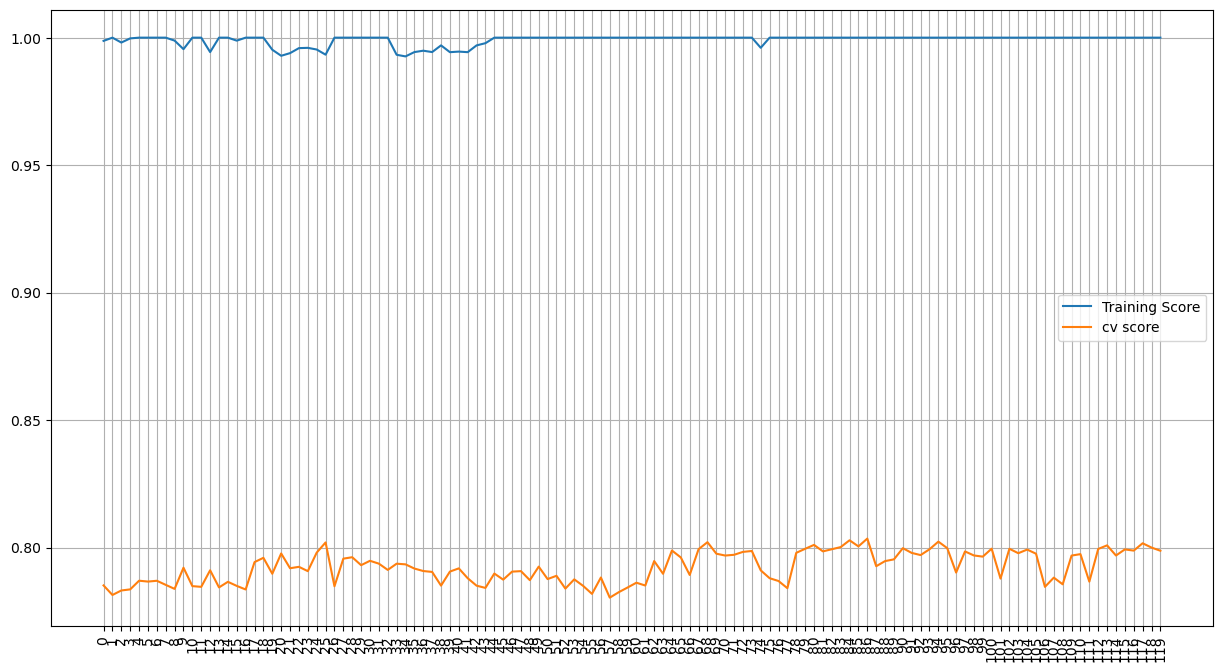

In [26]:
plt.figure(figsize=(15,8))
plt.plot(df["number"],df["user_attrs_training score"],label = "Training Score")
plt.plot(df["number"],df["value"],label = "cv score")
plt.legend()
plt.grid()
plt.xticks(df["number"], rotation=90)
plt.show()

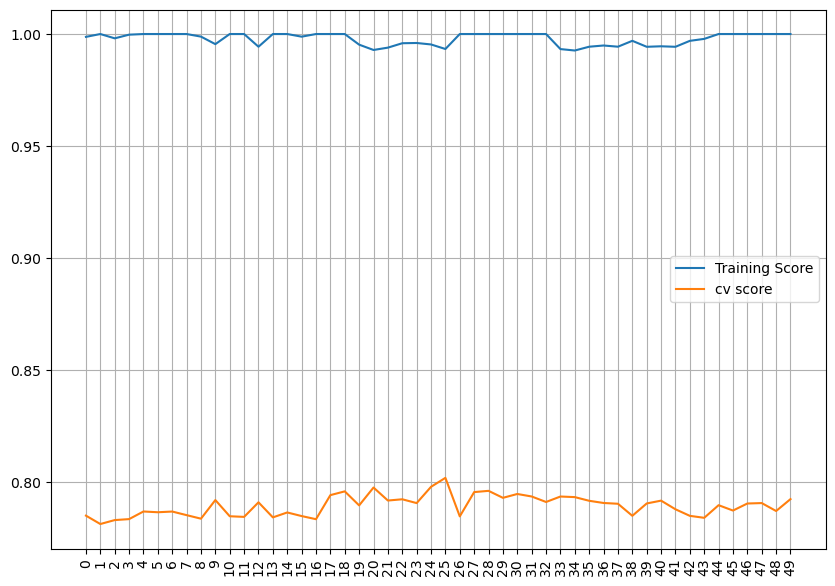

In [27]:
plt.figure(figsize=(10,7))
plt.plot(df["number"][0:50],df["user_attrs_training score"][0:50],label = "Training Score")
plt.plot(df["number"][0:50],df["value"][0:50],label = "cv score")
plt.legend()
plt.grid()
plt.xticks(df["number"][0:50], rotation=90)
plt.show()

In [28]:
study.best_trial

FrozenTrial(number=86, state=1, values=[0.803529464765184], datetime_start=datetime.datetime(2025, 2, 23, 18, 29, 45, 272542), datetime_complete=datetime.datetime(2025, 2, 23, 18, 30, 9, 704029), params={'neighbors1': 14, 'distance1': 2, 'weights1': 'distance', 'depth1': 25, 'neighbors2': 70, 'distance2': 1, 'weights2': 'distance', 'depth2': 17, 'min_splits': 23, 'min_leaf': 12, 'max_features': None, 'min_impurity': 0.0012076438021181794}, user_attrs={'training score': 1.0}, system_attrs={}, intermediate_values={}, distributions={'neighbors1': IntDistribution(high=20, log=False, low=10, step=1), 'distance1': CategoricalDistribution(choices=(1, 2)), 'weights1': CategoricalDistribution(choices=('uniform', 'distance')), 'depth1': IntDistribution(high=30, log=False, low=20, step=1), 'neighbors2': IntDistribution(high=130, log=False, low=60, step=1), 'distance2': CategoricalDistribution(choices=(1, 2)), 'weights2': CategoricalDistribution(choices=('uniform', 'distance')), 'depth2': IntDistr

In [29]:
df.iloc[25]

number                                               25
value                                          0.802017
datetime_start               2025-02-23 18:26:17.077410
datetime_complete            2025-02-23 18:26:40.783116
duration                         0 days 00:00:23.705706
params_depth1                                        24
params_depth2                                        15
params_distance1                                      1
params_distance2                                      1
params_max_features                                sqrt
params_min_impurity                            0.000209
params_min_leaf                                       9
params_min_splits                                    18
params_neighbors1                                    20
params_neighbors2                                   107
params_weights1                                 uniform
params_weights2                                 uniform
user_attrs_training score                      0

## Generalized Score Using Voting Ensemble with Best-Fit Models

In [31]:
model1 = KNeighborsClassifier(n_neighbors=20,p=1, weights="uniform")
model2 = DecisionTreeClassifier(max_depth=24)
model3 = KNeighborsClassifier(n_neighbors=107,p=1,weights="uniform")
model4 = DecisionTreeClassifier(max_depth=15, min_samples_split=18, min_samples_leaf=9, min_impurity_decrease=0.000209, max_features="sqrt")

ve = VotingClassifier(estimators= [("knn1",model1), ("DT1",model2), ("knn2",model3), ("DT2",model4)])

In [32]:
ve.fit(x_train,y_train)

VotingClassifier(estimators=[('knn1',
                              KNeighborsClassifier(n_neighbors=20, p=1)),
                             ('DT1', DecisionTreeClassifier(max_depth=24)),
                             ('knn2',
                              KNeighborsClassifier(n_neighbors=107, p=1)),
                             ('DT2',
                              DecisionTreeClassifier(max_depth=15,
                                                     max_features='sqrt',
                                                     min_impurity_decrease=0.000209,
                                                     min_samples_leaf=9,
                                                     min_samples_split=18))])

In [34]:
y_cap = ve.predict(x_test)
roc_auc_score( y_test, y_cap)

0.7233021344391952

---

**Generalized Score using Voting Ensemble = 0.723**

---

## B. Bagging Ensemble

+ We use Algorithm which must be OverFit for better result using Bagging Ensemble 

In [35]:
from sklearn.ensemble import BaggingClassifier

In [36]:
def objective(trial):
    
    base_model = trial.suggest_categorical("base_model", ["decision_tree", "knn"])
    
    if base_model == "knn":
    
        k1 = trial.suggest_int("neighbors1",3,10)         ## High Variance Model
        p1 = trial.suggest_categorical("distance1",[1,2])
        weights1 = trial.suggest_categorical("weights1",["uniform","distance"])

        model = KNeighborsClassifier(n_neighbors=k1, weights=weights1, p=p1)
    
    elif base_model == "decision_tree":

        min_split = trial.suggest_int("min_samples_split", 2, 10) 
        min_leaf = trial.suggest_int("min_samples_leaf", 2, 5)
        max_depth = trial.suggest_int("max_depth",20,30)
    
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_split, min_samples_leaf=min_leaf)     ## High variance Model
        
    n_est = trial.suggest_int("n_est",20,100)
    max_sample = trial.suggest_float("max_samples", 0.6, 0.9)
    
    be = BaggingClassifier(estimator=model, n_estimators=n_est, max_samples=max_sample)

    cv_score = cross_validate(estimator=be, X=x_train, y=y_train, cv=4,scoring="roc_auc")["test_score"].mean()
    train_score = cross_validate(estimator=be, X=x_train, y=y_train, cv=4,scoring="roc_auc", return_train_score=True)["train_score"].mean()
    
    trial.set_user_attr("training score",train_score)
    
    return cv_score

In [37]:
study = optuna.create_study(direction="maximize", sampler= optuna.samplers.TPESampler())

[I 2025-02-23 18:46:52,392] A new study created in memory with name: no-name-6a8a9e72-aec4-43d4-820f-7724b95e05f6


In [38]:
study.optimize(objective,n_trials=120, n_jobs = -1)

[I 2025-02-23 18:47:39,459] Trial 0 finished with value: 0.8165203969704322 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_depth': 22, 'n_est': 36, 'max_samples': 0.7974247537626307}. Best is trial 0 with value: 0.8165203969704322.
[I 2025-02-23 18:47:47,673] Trial 3 finished with value: 0.817559851415453 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 25, 'n_est': 57, 'max_samples': 0.6152897315150267}. Best is trial 3 with value: 0.817559851415453.
[I 2025-02-23 18:48:14,319] Trial 7 finished with value: 0.8223603622109548 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_depth': 22, 'n_est': 97, 'max_samples': 0.8011345328774384}. Best is trial 7 with value: 0.8223603622109548.
[I 2025-02-23 18:48:17,888] Trial 8 finished with value: 0.8212282876230934 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 6,

[I 2025-02-23 18:56:12,250] Trial 33 finished with value: 0.8224640445620083 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 26, 'n_est': 87, 'max_samples': 0.8293681530250661}. Best is trial 15 with value: 0.8230124873816314.
[I 2025-02-23 18:56:22,942] Trial 9 finished with value: 0.7836251382948509 and parameters: {'base_model': 'knn', 'neighbors1': 9, 'distance1': 1, 'weights1': 'distance', 'n_est': 69, 'max_samples': 0.8031283021933715}. Best is trial 15 with value: 0.8230124873816314.
[I 2025-02-23 18:56:29,721] Trial 34 finished with value: 0.8204851715940014 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_depth': 26, 'n_est': 69, 'max_samples': 0.8338743774030577}. Best is trial 15 with value: 0.8230124873816314.
[I 2025-02-23 18:56:55,425] Trial 35 finished with value: 0.8210513525575858 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 4, 'min_sa

[I 2025-02-23 19:14:32,020] Trial 61 finished with value: 0.823033883315021 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 28, 'n_est': 83, 'max_samples': 0.6091988658999684}. Best is trial 57 with value: 0.8235640165318823.
[I 2025-02-23 19:14:38,278] Trial 64 finished with value: 0.8218189950940066 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 28, 'n_est': 63, 'max_samples': 0.60106002390284}. Best is trial 57 with value: 0.8235640165318823.
[I 2025-02-23 19:14:39,130] Trial 62 finished with value: 0.8228041728888751 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 28, 'n_est': 84, 'max_samples': 0.6252736970976895}. Best is trial 57 with value: 0.8235640165318823.
[I 2025-02-23 19:14:43,283] Trial 65 finished with value: 0.8210433337369996 and parameters: {'base_model': 'decision_tree', 'min_samples_spli

[I 2025-02-23 19:17:04,369] Trial 90 finished with value: 0.821234352132819 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_depth': 24, 'n_est': 72, 'max_samples': 0.6630165502267369}. Best is trial 69 with value: 0.8240682184625637.
[I 2025-02-23 19:17:18,799] Trial 92 finished with value: 0.8219095729274359 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_depth': 22, 'n_est': 85, 'max_samples': 0.6662716344512846}. Best is trial 69 with value: 0.8240682184625637.
[I 2025-02-23 19:17:19,485] Trial 89 finished with value: 0.8234044329084266 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_depth': 22, 'n_est': 98, 'max_samples': 0.725430325077088}. Best is trial 69 with value: 0.8240682184625637.
[I 2025-02-23 19:17:22,727] Trial 91 finished with value: 0.8242905292413699 and parameters: {'base_model': 'decision_tree', 'min_samples_spl

[I 2025-02-23 19:20:00,834] Trial 118 finished with value: 0.823746522175184 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_depth': 25, 'n_est': 91, 'max_samples': 0.7209721895252637}. Best is trial 91 with value: 0.8242905292413699.
[I 2025-02-23 19:20:02,323] Trial 119 finished with value: 0.8227472568249075 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_depth': 25, 'n_est': 91, 'max_samples': 0.6567017119836646}. Best is trial 91 with value: 0.8242905292413699.


In [39]:
study.best_value

0.8242905292413699

In [40]:
df1 = study.trials_dataframe()
df1

,number,value,datetime_start,datetime_complete,duration,params_base_model,params_distance1,params_max_depth,params_max_samples,params_min_samples_leaf,params_min_samples_split,params_n_est,params_neighbors1,params_weights1,user_attrs_training score,state
0,0,0.816520,2025-02-23 18:47:13.114579,2025-02-23 18:47:39.458725,0 days 00:00:26.344146,decision_tree,NaN,22.0,0.797425,4.0,6.0,36,NaN,NaN,0.979651,COMPLETE
1,1,0.789339,2025-02-23 18:47:13.116065,2025-02-23 18:49:57.226101,0 days 00:02:44.110036,knn,1.0,NaN,0.727693,NaN,NaN,30,10.0,uniform,0.855129,COMPLETE
2,2,0.781455,2025-02-23 18:47:13.123081,2025-02-23 18:51:10.302323,0 days 00:03:57.179242,knn,2.0,NaN,0.643147,NaN,NaN,67,7.0,distance,0.999826,COMPLETE
3,3,0.817560,2025-02-23 18:47:13.134347,2025-02-23 18:47:47.672671,0 days 00:00:34.538324,decision_tree,NaN,25.0,0.615290,2.0,5.0,57,NaN,NaN,0.990871,COMPLETE
4,4,0.754246,2025-02-23 18:47:13.142120,2025-02-23 18:48:39.397190,0 days 00:01:26.255070,knn,2.0,NaN,0.643755,NaN,NaN,29,3.0,distance,0.997341,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,0.823034,2025-02-23 19:19:06.081932,2025-02-23 19:19:52.102498,0 days 00:00:46.020566,decision_tree,NaN,21.0,0.719808,5.0,6.0,91,NaN,NaN,0.965723,COMPLETE
116,116,0.822538,2025-02-23 19:19:08.836157,2025-02-23 19:19:54.978919,0 days 00:00:46.142762,decision_tree,NaN,25.0,0.722324,5.0,6.0,94,NaN,NaN,0.966308,COMPLETE
117,117,0.821664,2025-02-23 19:19:22.840441,2025-02-23 19:19:59.801499,0 days 00:00:36.961058,decision_tree,NaN,22.0,0.656779,5.0,4.0,91,NaN,NaN,0.961237,COMPLETE
118,118,0.823747,2025-02-23 19:19:23.152631,2025-02-23 19:20:00.833141,0 days 00:00:37.680510,decision_tree,NaN,25.0,0.720972,5.0,7.0,91,NaN,NaN,0.966461,COMPLETE


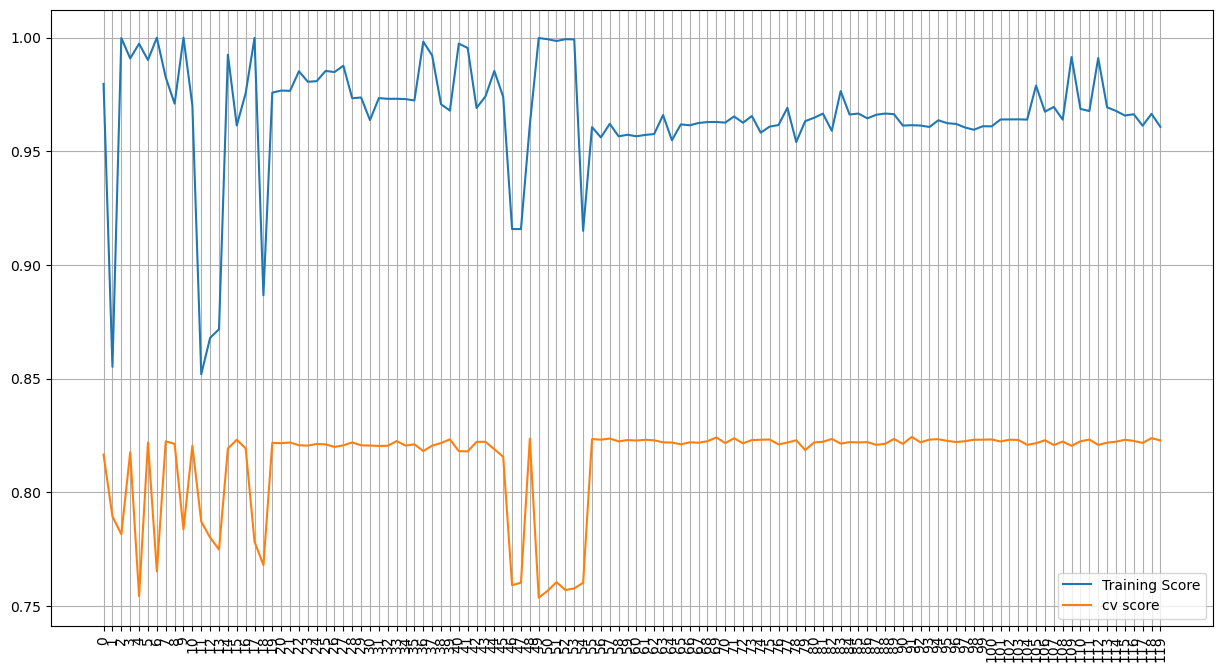

In [42]:
plt.figure(figsize=(15,8))
plt.plot(df1["number"],df1["user_attrs_training score"],label = "Training Score")
plt.plot(df1["number"],df1["value"],label = "cv score")
plt.legend()
plt.grid()
plt.xticks(df1["number"], rotation=90)
plt.show()

In [43]:
study.best_trial

FrozenTrial(number=91, state=1, values=[0.8242905292413699], datetime_start=datetime.datetime(2025, 2, 23, 19, 16, 31, 186825), datetime_complete=datetime.datetime(2025, 2, 23, 19, 17, 22, 727680), params={'base_model': 'decision_tree', 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_depth': 22, 'n_est': 97, 'max_samples': 0.6619244463764207}, user_attrs={'training score': 0.9614671339011601}, system_attrs={}, intermediate_values={}, distributions={'base_model': CategoricalDistribution(choices=('decision_tree', 'knn')), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=5, log=False, low=2, step=1), 'max_depth': IntDistribution(high=30, log=False, low=20, step=1), 'n_est': IntDistribution(high=100, log=False, low=20, step=1), 'max_samples': FloatDistribution(high=0.9, log=False, low=0.6, step=None)}, trial_id=91, value=None)

In [44]:
## best-fit model

df1.iloc[11]

number                                               11
value                                          0.787015
datetime_start               2025-02-23 18:48:17.892678
datetime_complete            2025-02-23 18:51:38.324202
duration                         0 days 00:03:20.431524
params_base_model                                   knn
params_distance1                                    2.0
params_max_depth                                    NaN
params_max_samples                             0.616407
params_min_samples_leaf                             NaN
params_min_samples_split                            NaN
params_n_est                                         47
params_neighbors1                                   9.0
params_weights1                                 uniform
user_attrs_training score                      0.851875
state                                          COMPLETE
Name: 11, dtype: object

## Generalized Score Using Bagging Ensemble with Best-Fit Model

In [46]:
model = KNeighborsClassifier(n_neighbors=9, p=2, weights="uniform")
br = BaggingClassifier(estimator=model, n_estimators=47, max_samples=0.616407)

In [47]:
br.fit(x_train, y_train)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=9),
                  max_samples=0.616407, n_estimators=47)

In [48]:
y_capp = br.predict(x_test)
roc_auc_score( y_test, y_capp)

0.716449011015253

---

**Generalized Score using Bagging Ensemble = 0.716**

---

## C. Random Forest

+ As we already did randomforest , So we will use that data here to check Generalized Score 

In [21]:
study.best_value

0.8342629295025222

In [25]:
study.best_trial

FrozenTrial(number=89, state=1, values=[0.8342629295025222], datetime_start=datetime.datetime(2025, 2, 23, 19, 50, 48, 907618), datetime_complete=datetime.datetime(2025, 2, 23, 19, 51, 17, 517554), params={'min_samples_split': 3, 'min_samples_leaf': 5, 'max_feature': 'sqrt', 'n_est': 91, 'max_samples': 0.7389162614856101, 'max_depth': 20}, user_attrs={'training score': 0.9579422366132948}, system_attrs={}, intermediate_values={}, distributions={'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=5, log=False, low=1, step=1), 'max_feature': CategoricalDistribution(choices=('log2', 'sqrt')), 'n_est': IntDistribution(high=100, log=False, low=20, step=1), 'max_samples': FloatDistribution(high=0.9, log=False, low=0.6, step=None), 'max_depth': IntDistribution(high=30, log=False, low=20, step=1)}, trial_id=89, value=None)

## Generalized Score Using Random Forest with Best-Fit Model

In [28]:
y_cappp = rf.predict(x_test)
roc_auc_score( y_test, y_cappp)

0.7520601249975496

---

**Generalized Score using Random Forest = 0.752**

---

## D. Logistic Regression 

In [17]:
from sklearn.linear_model import LogisticRegression

+ As we know to get best performance by LogisticRegression, our data points should be linearly separable, So we will first check the peroformance the Model, if it is bad, then only we will apply polynomial features

In [27]:
def objective(trial):
    
    var1 = trial.suggest_categorical("var1", [("liblinear","l1"), ("liblinear","l2"), ("newton-cholesky", "l2")])    
    
    c = trial.suggest_categorical("C",[0.001,0.01,0.1,1,10,100])
    
    lr = LogisticRegression(penalty=var1[1], solver=var1[0], C=c)

    cv_error = cross_validate(estimator=lr, X=x_train, y=y_train, cv=4,scoring="neg_log_loss")["test_score"].mean()
    train_error = cross_validate(estimator=lr, X=x_train, y=y_train, cv=4,scoring="neg_log_loss", return_train_score=True)["train_score"].mean()
    
    trial.set_user_attr("training score",train_error)
    
    return cv_error

In [28]:
study = optuna.create_study(direction="maximize", sampler= optuna.samplers.TPESampler())

[I 2025-03-11 16:47:26,337] A new study created in memory with name: no-name-5dde87f9-9d6f-4296-bded-89d7630c9ce7


In [30]:
study.optimize(objective,n_trials=50, n_jobs=-1)

C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('newton-cholesky', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWar

C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('newton-cholesky', 'l2') which is of type tuple.
  warnings.warn(message)
[I 2025-03-11 16:47:45,053] Trial 14 finished with value: -0.4983936710720869 and parameters: {'v

[I 2025-03-11 16:47:46,082] Trial 25 finished with value: -0.49844403826785477 and parameters: {'var1': ('liblinear', 'l1'), 'C': 100}. Best is trial 6 with value: -0.4983936710720869.
[I 2025-03-11 16:47:46,083] Trial 23 finished with value: -0.49844557199584505 and parameters: {'var1': ('liblinear', 'l1'), 'C': 100}. Best is trial 6 with value: -0.4983936710720869.
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Py

C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('newton-cholesky', 'l2') which is of type tuple.
  warnings.warn(message)
[I 2025-03-11 16:47:46,902] Trial 31 finished with value: -0.5138546296268253 and parameters: {'v

C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('newton-cholesky', 'l2') which is of type tuple.
  warnings.warn(message)
[I 2025-03-11 16:47:47,704] Trial 40 finished with value: -0.49843942009971126 and parameters: {'

C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('newton-cholesky', 'l2') which is of type tuple.
  warnings.warn(message)
[I 2025-03-11 16:47:48,338] Trial 48 finished with value: -0.4984122560560871 and parameters: {'v

In [31]:
study.best_trial

FrozenTrial(number=6, state=1, values=[-0.4983936710720869], datetime_start=datetime.datetime(2025, 3, 11, 16, 47, 26, 850991), datetime_complete=datetime.datetime(2025, 3, 11, 16, 47, 27, 572001), params={'var1': ('newton-cholesky', 'l2'), 'C': 1}, user_attrs={'training score': -0.4930522329033816}, system_attrs={}, intermediate_values={}, distributions={'var1': CategoricalDistribution(choices=(('liblinear', 'l1'), ('liblinear', 'l2'), ('newton-cholesky', 'l2'))), 'C': CategoricalDistribution(choices=(0.001, 0.01, 0.1, 1, 10, 100))}, trial_id=6, value=None)

+ As we can see performance is not good, So we can try for **Polynomial features**

### Applying Polynomial Features

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
def objective(trial):
    
    degree = trial.suggest_categorical("degree",[2,3])
    
    pf = PolynomialFeatures(degree= degree)
    
    x_train_p = pf.fit_transform(pd.DataFrame(x_train))
    x_test_p = pf.transform(pd.DataFrame(x_test))
    
    var1 = trial.suggest_categorical("var1", [("liblinear","l1"), ("liblinear","l2"), ("newton-cholesky", "l2")])    
    
    c = trial.suggest_categorical("C",[0.001,0.01,0.1,1,10,100])
    
    lr = LogisticRegression(penalty=var1[1], solver=var1[0], C=c)

    cv_error = cross_validate(estimator=lr, X=x_train_p, y=y_train, cv=4,scoring="neg_log_loss")["test_score"].mean()
    train_error = cross_validate(estimator=lr, X=x_train_p, y=y_train, cv=4,scoring="neg_log_loss", return_train_score=True)["train_score"].mean()
    
    trial.set_user_attr("training score",train_error)
    
    return cv_error

In [42]:
study = optuna.create_study(direction="maximize", sampler= optuna.samplers.TPESampler())

[I 2025-03-11 17:52:29,201] A new study created in memory with name: no-name-5b537c7b-2341-48b7-bce2-efd6b51c2eba


In [43]:
study.optimize(objective,n_trials=50, n_jobs=-1)

C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('newton-cholesky', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWar

[I 2025-03-11 17:52:37,975] Trial 5 finished with value: -0.4936793524533006 and parameters: {'degree': 2, 'var1': ('liblinear', 'l2'), 'C': 0.01}. Best is trial 5 with value: -0.4936793524533006.
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persist

[I 2025-03-11 17:56:56,792] Trial 1 finished with value: -0.6456812932166065 and parameters: {'degree': 3, 'var1': ('liblinear', 'l2'), 'C': 0.1}. Best is trial 0 with value: -0.4883628920429467.
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persiste

[I 2025-03-11 18:00:46,946] Trial 24 finished with value: -0.5083115112332994 and parameters: {'degree': 2, 'var1': ('liblinear', 'l2'), 'C': 0.001}. Best is trial 0 with value: -0.4883628920429467.
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persi

[I 2025-03-11 18:01:27,604] Trial 29 finished with value: -0.4936793524533006 and parameters: {'degree': 2, 'var1': ('liblinear', 'l2'), 'C': 0.01}. Best is trial 0 with value: -0.4883628920429467.
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persis

[I 2025-03-11 18:03:42,184] Trial 35 finished with value: -0.5035991961809753 and parameters: {'degree': 2, 'var1': ('liblinear', 'l1'), 'C': 100}. Best is trial 0 with value: -0.4883628920429467.
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persist

[I 2025-03-11 18:04:40,881] Trial 47 finished with value: -0.492026601488649 and parameters: {'degree': 2, 'var1': ('newton-cholesky', 'l2'), 'C': 0.01}. Best is trial 0 with value: -0.4883628920429467.
[I 2025-03-11 18:04:40,944] Trial 46 finished with value: -0.492026601488649 and parameters: {'degree': 2, 'var1': ('newton-cholesky', 'l2'), 'C': 0.01}. Best is trial 0 with value: -0.4883628920429467.
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(messa

In [44]:
study.best_trial

FrozenTrial(number=0, state=1, values=[-0.4883628920429467], datetime_start=datetime.datetime(2025, 3, 11, 17, 52, 29, 762727), datetime_complete=datetime.datetime(2025, 3, 11, 17, 52, 42, 623697), params={'degree': 2, 'var1': ('liblinear', 'l1'), 'C': 0.1}, user_attrs={'training score': -0.4654714557328769}, system_attrs={}, intermediate_values={}, distributions={'degree': CategoricalDistribution(choices=(2, 3)), 'var1': CategoricalDistribution(choices=(('liblinear', 'l1'), ('liblinear', 'l2'), ('newton-cholesky', 'l2'))), 'C': CategoricalDistribution(choices=(0.001, 0.01, 0.1, 1, 10, 100))}, trial_id=0, value=None)

+ **As we can see by applying Polynomial Features, Score does not increase, So now we will use different Feature Engineering techniques**

+ **None of the Feature which we did distribution is Right skewed or left skewed, so we can't do log and sqrt Feature Engineering , So it's better to not to use LOR Model for this data**

---

## Dump the Best-Model

---

In [18]:
rf = RandomForestClassifier(n_estimators=84, max_samples=0.604329, max_features="sqrt", min_samples_leaf=5, min_samples_split=7, max_depth=20)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder

In [120]:
ordinal_cols = {
    "Education Level":["High School", "Associate Degree", "Bachelor’s Degree", "Master’s Degree", "PhD"],
    "Company Reputation": ["Poor", "Fair", "Good", "Excellent"]
}

nominal_cols = ["Remote Work","Leadership Opportunities"]
cont_cols = ["Age", "Monthly Income", "Distance from Home","Number of Dependents", "Company Tenure"]

ordinal_encoder = OrdinalEncoder(categories=[ordinal_cols[col] for col in ordinal_cols])

onehot_encoder = OneHotEncoder(drop="first", sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(categories=[ordinal_cols[col] for col in ordinal_cols]) , [i for i, col in enumerate(x_train.columns) if col in ordinal_cols]),  # Ordinal Encoding
        ("onehot", OneHotEncoder(drop="first", sparse_output=False) , [i for i, col in enumerate(x_train.columns) if col in nominal_cols]),  # One-Hot Encoding
        ("Robust Scaling", RobustScaler(), [i for i, col in enumerate(x_train.columns) if col in cont_cols])   ## Robust Scaling
    ], remainder="passthrough"
)

In [121]:
final_pl = Pipeline(steps = [("Pre-processing", preprocessor),
                             ("Model",  RandomForestClassifier(n_estimators=84, max_samples=0.604329, max_features="sqrt", min_samples_leaf=5, min_samples_split=7, max_depth=20))])

In [132]:
final_pl.fit(x_train,y_train)

Pipeline(steps=[('Pre-processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              'Associate '
                                                                              'Degree',
                                                                              'Bachelor’s '
                                                                              'Degree',
                                                                              'Master’s '
                                                                              'Degree',
                                                                              'PhD'],
                                                                             ['Poor',
                                                                              'Fair',
                                                                              'Good',
                                                                              'Excellent']]),
                                                  [3, 8]),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [6, 7]),
                                                 ('Robust Scaling',
                                                  RobustScaler(),
                                                  [0, 1, 2, 4, 5])])),
                ('Model',
                 RandomForestClassifier(max_depth=20, max_samples=0.604329,
                                        min_samples_leaf=5, min_samples_split=7,
                                        n_estimators=84))])

In [133]:
import pickle

with open("Employee_Attrition1.pkl", "wb") as file:
    pickle.dump(final_pl, file)